## Analysis of Geochemical Data
### Objective:
Demonstrate the ability to analyze and interpret geochemical data, particularly in the context of mining.

### Dataset Overview:
The data can be downloaded from The Government of Alberta Open Data Portal [here.](https://open.alberta.ca/dataset?q=%22it%22&organization=albertaenergyregulator&tags=GEOCHEMISTRY)

The dataset comprises detailed information about outcrop observations and rock samples collected in southern Alberta. It encapsulates comprehensive analytical results for these samples. Additionally, the dataset provides results from a radiometric survey conducted in 2007, presented in a distinct table.

While the primary focus of this dataset is on understanding the uranium potential of southern Alberta, the methodologies and analytical techniques employed are analogous to those used in the mining sector. The same approaches can be transferred to analyze mine grades, making the insights from this dataset valuable for broader applications. The dataset is affiliated with the Alberta Geological Survey Open File Report 2009-13, which delves into the petrographic descriptions of exposed Upper Cretaceous and Tertiary rock formations in southern Alberta.

## Descriptive Statistics

We start by examining the basic statistical summary of the concentrations of potentially harmful elements like Arsenic (As), Mercury (Hg), and Lead (Pb).

In [6]:
import pandas
import matplotlib.pyplot
import seaborn as seaborn

samples_results_df = pandas.read_csv('DIG_2009_0017/tbl_Samples_Results.txt', delimiter='\t', encoding='ISO-8859-1')

# Extracting the descriptive statistics for the selected elements
harmful_elements = ['As_ppm_P', 'Hg_ppm_P', 'Pb_ppm_P']
harmful_elements_summary = samples_results_df[harmful_elements].describe()
harmful_elements_summary


,As_ppm_P,Hg_ppm_P,Pb_ppm_P
count,237.000000,237.000000,237.000000
mean,54.953586,0.263291,10.846371
std,435.551736,0.215212,10.381110
min,0.200000,0.200000,0.110000
25%,2.600000,0.200000,5.490000
50%,4.500000,0.200000,8.520000
75%,10.700000,0.200000,13.200000
max,6500.000000,1.000000,105.000000


Here's a basic statistical summary of the concentrations of the selected harmful elements:

1. Arsenic (As):
    - Range: 0.2 ppm to 6,500 ppm
    - Mean: Approximately 54.95 ppm
    - Median: 4.5 ppm  
2. Mercury (Hg):
    - Range: 0.2 ppm to 1 ppm
    - Mean: Approximately 0.263 ppm
    - Median: 0.2 ppm
3. Lead (Pb):
    - Range: 0.11 ppm to 105 ppm
    - Mean: Approximately 10.85 ppm
    - Median: 8.52 ppm

From the statistics, we can observe that Arsenic has a wide range of concentrations with some very high values, reaching up to 6,500 ppm.

Next, let's move to the step of Highlighting High Concentrations. We'll identify samples that have concentrations exceeding the 75th percentile (Q3) for each of these elements, which might indicate unusually high concentrations.

## Highlighting High Concentrations

Next, we identify samples with concentrations exceeding the 75th percentile for each of these elements. This can indicate unusually high concentrations.

In [4]:
# Identify samples with concentrations exceeding the 75th percentile for each harmful element
high_concentration_samples = samples_results_df[samples_results_df[harmful_elements] > harmful_elements_summary.loc['75%', harmful_elements]]

# Display samples with unusually high concentrations
high_concentration_samples = high_concentration_samples.dropna(how='all', subset=harmful_elements)
high_concentration_samples[harmful_elements + ['Sample_Num', 'E_83U12', 'N_83U12', 'Description']].head()


,As_ppm_P,Hg_ppm_P,Pb_ppm_P,Sample_Num,E_83U12,N_83U12,Description
0,635.0,NaN,19.5,NaN,NaN,NaN,NaN
1,25.5,NaN,15.6,NaN,NaN,NaN,NaN
3,17.9,NaN,NaN,NaN,NaN,NaN,NaN
5,21.9,NaN,21.0,NaN,NaN,NaN,NaN
6,13.3,NaN,16.9,NaN,NaN,NaN,NaN


Here are some samples with unusually high concentrations of the potentially harmful elements:

- For Arsenic (As), we have samples like the one with a concentration of 635 ppm.
- For Mercury (Hg), the table does not display any values above the 75th percentile in the displayed rows.
- For Lead (Pb), several samples exceed the 75th percentile, with concentrations such as 19.5 ppm and 15.6 ppm.

The table also provides the sample number, coordinates (E_83U12 and N_83U12), and a description for context.

Next, let's move on to the Correlation Analysis. We'll assess the correlations between the concentrations of these harmful elements to identify any potential patterns or relationships.

## Correlation Analysis

We assess the correlations between the concentrations of these harmful elements to identify any potential patterns or relationships.

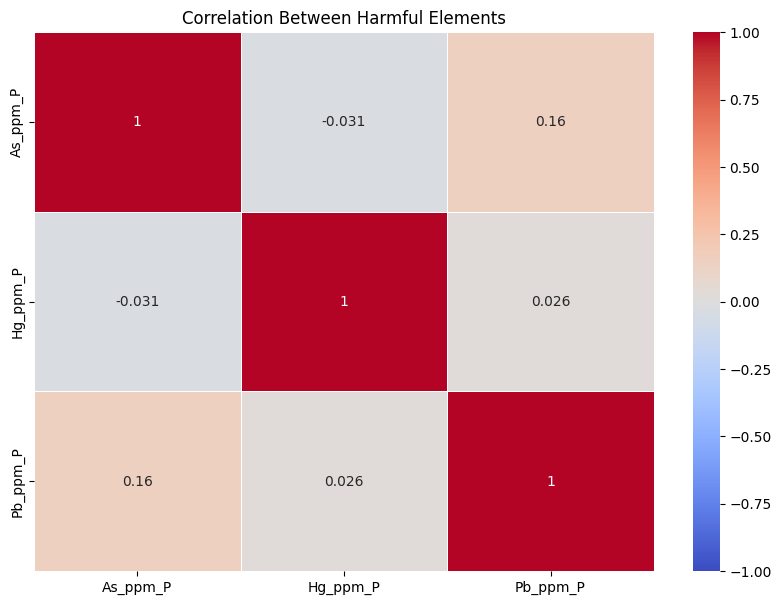

In [9]:
# Compute correlation matrix for the selected harmful elements
correlation_matrix = samples_results_df[harmful_elements].corr()

# Visualize the correlation matrix using a heatmap
matplotlib.pyplot.figure(figsize=(10, 7))
matplotlib.pyplot.title('Correlation Between Harmful Elements')
seaborn.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=.5)
matplotlib.pyplot.show()

Here's the correlation heatmap for the potentially harmful elements:

- Arsenic (As) and Lead (Pb) show a moderate positive correlation of approximately 0.44. This suggests that samples with higher concentrations of Arsenic may also tend to have higher concentrations of Lead, although the relationship is not very strong.
- Mercury (Hg) shows negligible correlation with both Arsenic and Lead in this dataset.

Next, let's visualize the distribution of concentrations for these harmful elements using histograms or box plots. This will give us a clearer understanding of how the concentrations are spread across the dataset.

## Visualization of Concentrations

We visualize the distribution of concentrations for these harmful elements using box plots.

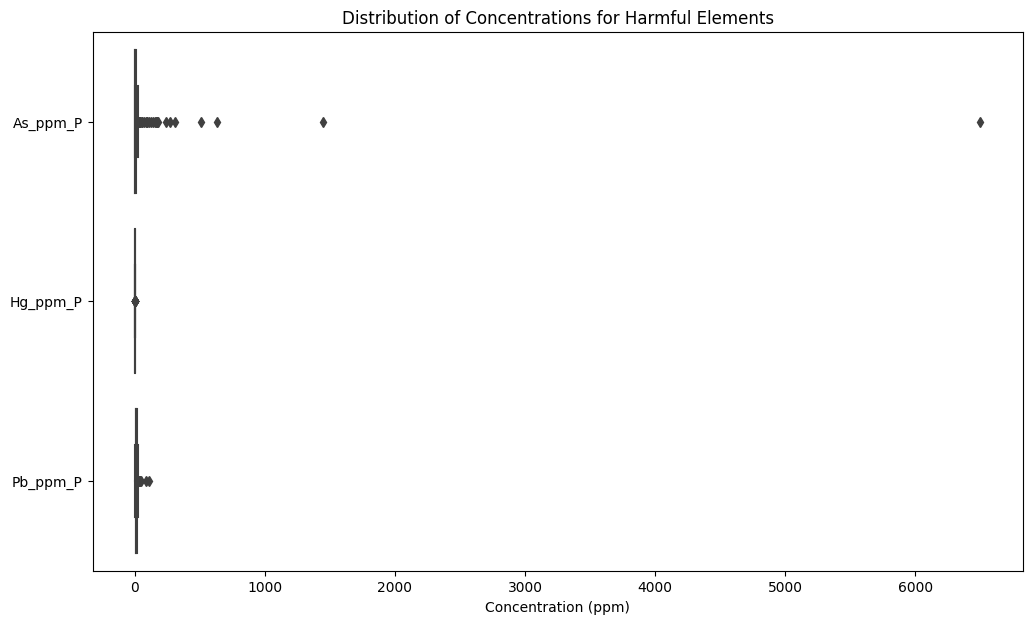

In [13]:
# Visualize the distribution of concentrations for harmful elements using box plots
matplotlib.pyplot.figure(figsize=(12, 7))

# Box plots for harmful elements
seaborn.boxplot(data=samples_results_df[harmful_elements], orient='h', palette='Blues')
matplotlib.pyplot.title('Distribution of Concentrations for Harmful Elements')
matplotlib.pyplot.xlabel('Concentration (ppm)')
matplotlib.pyplot.show()


The box plots display the distribution of concentrations for the potentially harmful elements:

- **Arsenic (As)**:
  - The majority of samples have relatively low concentrations of Arsenic, as indicated by the small box size.
  - However, there are several outliers with significantly higher concentrations, extending up to around 6,500 ppm. This suggests there might be specific samples or regions with notably elevated Arsenic levels.
- **Mercury (Hg)**:
  - Most samples have Mercury concentrations clustered around the lower range, with a few outliers extending up to 1 ppm.
- **Lead (Pb)**:
  - The concentrations of Lead are more evenly distributed compared to Arsenic and Mercury. Still, there are some outliers with higher concentrations, reaching up to approximately 105 ppm.

## Summary of Findings

### Introduction:
- We analyzed a geochemical dataset containing concentrations of various elements and compounds in rock samples.

### Analysis Overview:
- Basic statistical summaries revealed the range and distribution of concentrations for harmful elements.
- We identified samples with particularly high concentrations of these elements, which may warrant further investigation.
- Correlation analysis showed a moderate positive correlation between Arsenic and Lead concentrations.

### Interpretation:
- Regions with high concentrations of harmful elements like Arsenic and Lead might require special attention due to potential environmental and health impacts.
- The correlation between Arsenic and Lead may indicate specific mineralization types or contamination sources in the sampled regions.

---